In [1]:
import sys
sys.path.append('..')
from d2l import torch as d2l
import torch
from torch import nn

In [2]:
n_train = 50
x_train, _ = torch.sort(torch.rand(n_train) * 5)
def f(x):
    return 2*torch.sin(x) + x**0.8
y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train, ))
x_test = torch.arange(0, 5, 0.1)
y_truth = f(x_test)
n_test = len(x_test)
n_test

50

In [3]:
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'], xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5)

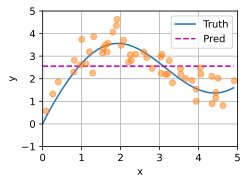

In [4]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

In [5]:
X_repeat = x_test.repeat_interleave(n_train, dim=0).reshape((-1, n_train))
X_repeat, x_train

(tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
         [0.2000, 0.2000, 0.2000,  ..., 0.2000, 0.2000, 0.2000],
         ...,
         [4.7000, 4.7000, 4.7000,  ..., 4.7000, 4.7000, 4.7000],
         [4.8000, 4.8000, 4.8000,  ..., 4.8000, 4.8000, 4.8000],
         [4.9000, 4.9000, 4.9000,  ..., 4.9000, 4.9000, 4.9000]]),
 tensor([0.0901, 0.2600, 0.4002, 0.7987, 0.8151, 0.9743, 1.0028, 1.1157, 1.1996,
         1.2840, 1.3099, 1.5390, 1.5524, 1.6117, 1.6543, 1.6827, 1.8030, 1.8932,
         1.9081, 2.0152, 2.0750, 2.2036, 2.2503, 2.2724, 2.3865, 2.5938, 2.6702,
         2.8086, 3.0347, 3.0403, 3.0624, 3.1582, 3.2096, 3.2491, 3.3321, 3.5385,
         3.5470, 3.6684, 3.8360, 3.9397, 3.9417, 4.0496, 4.0614, 4.3416, 4.3503,
         4.4394, 4.4438, 4.5009, 4.6267, 4.9188]))

In [6]:
X_repeat-x_train

tensor([[-0.0901, -0.2600, -0.4002,  ..., -4.5009, -4.6267, -4.9188],
        [ 0.0099, -0.1600, -0.3002,  ..., -4.4009, -4.5267, -4.8188],
        [ 0.1099, -0.0600, -0.2002,  ..., -4.3009, -4.4267, -4.7188],
        ...,
        [ 4.6099,  4.4400,  4.2998,  ...,  0.1991,  0.0733, -0.2188],
        [ 4.7099,  4.5400,  4.3998,  ...,  0.2991,  0.1733, -0.1188],
        [ 4.8099,  4.6400,  4.4998,  ...,  0.3991,  0.2733, -0.0188]])

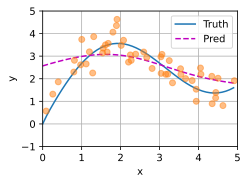

In [7]:
attention_weights = nn.functional.softmax(-(X_repeat-x_train)**2/2, dim=1)
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

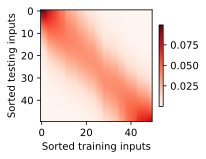

In [8]:
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0), xlabel="Sorted training inputs", ylabel="Sorted testing inputs")

In [9]:
X = torch.ones((2, 1, 4))
Y = torch.ones((2, 4, 6))
torch.bmm(X, Y).shape

torch.Size([2, 1, 6])

In [10]:
weights = torch.ones((2, 10)) * 0.1
values = torch.arange(20.0).reshape((2, 10))
print(weights.unsqueeze(1).shape, values.unsqueeze(-1).shape)
torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))

torch.Size([2, 1, 10]) torch.Size([2, 10, 1])


tensor([[[ 4.5000]],

        [[14.5000]]])

In [11]:
class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = nn.Parameter(torch.rand((1, )), requires_grad=True)
    
    def forward(self, queries, keys, values):
        queires = queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))
        self.attention_weights = nn.functional.softmax(-((queires - keys) * self.w)**2 / 2, dim=1)
        return torch.bmm(self.attention_weights.unsqueeze(1), values.unsqueeze(-1)).reshape(-1)

In [12]:
X_tile = x_train.repeat((n_train, 1))
x_train, X_tile

(tensor([0.0901, 0.2600, 0.4002, 0.7987, 0.8151, 0.9743, 1.0028, 1.1157, 1.1996,
         1.2840, 1.3099, 1.5390, 1.5524, 1.6117, 1.6543, 1.6827, 1.8030, 1.8932,
         1.9081, 2.0152, 2.0750, 2.2036, 2.2503, 2.2724, 2.3865, 2.5938, 2.6702,
         2.8086, 3.0347, 3.0403, 3.0624, 3.1582, 3.2096, 3.2491, 3.3321, 3.5385,
         3.5470, 3.6684, 3.8360, 3.9397, 3.9417, 4.0496, 4.0614, 4.3416, 4.3503,
         4.4394, 4.4438, 4.5009, 4.6267, 4.9188]),
 tensor([[0.0901, 0.2600, 0.4002,  ..., 4.5009, 4.6267, 4.9188],
         [0.0901, 0.2600, 0.4002,  ..., 4.5009, 4.6267, 4.9188],
         [0.0901, 0.2600, 0.4002,  ..., 4.5009, 4.6267, 4.9188],
         ...,
         [0.0901, 0.2600, 0.4002,  ..., 4.5009, 4.6267, 4.9188],
         [0.0901, 0.2600, 0.4002,  ..., 4.5009, 4.6267, 4.9188],
         [0.0901, 0.2600, 0.4002,  ..., 4.5009, 4.6267, 4.9188]]))

In [13]:
Y_tile = y_train.repeat((n_train, 1))

In [19]:
keys = X_tile[(1-torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))
keys.shape

torch.Size([50, 49])

In [15]:
values = Y_tile[(1-torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))
values

tensor([[1.3188, 1.8626, 2.2973,  ..., 2.0228, 0.8128, 1.9142],
        [0.5705, 1.8626, 2.2973,  ..., 2.0228, 0.8128, 1.9142],
        [0.5705, 1.3188, 2.2973,  ..., 2.0228, 0.8128, 1.9142],
        ...,
        [0.5705, 1.3188, 1.8626,  ..., 1.3919, 0.8128, 1.9142],
        [0.5705, 1.3188, 1.8626,  ..., 1.3919, 2.0228, 1.9142],
        [0.5705, 1.3188, 1.8626,  ..., 1.3919, 2.0228, 0.8128]])

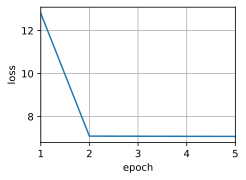

In [16]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])

for epoch in range(5):
    trainer.zero_grad()
    l = loss(net(x_train, keys, values), y_train) / 2
    l.sum().backward()
    trainer.step()
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(epoch + 1, float(l.sum()))

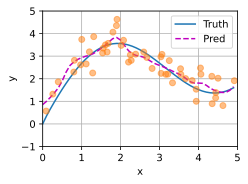

In [17]:
keys = x_train.repeat((n_test, 1))
values = y_train.repeat((n_test, 1))
y_hat = net(x_test, keys, values).unsqueeze(1).detach()
plot_kernel_reg(y_hat)

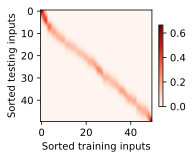

In [18]:
d2l.show_heatmaps(net.attention_weights.unsqueeze(0).unsqueeze(0),
    xlabel='Sorted training inputs',
    ylabel='Sorted testing inputs')